# Exploring the Beauty of the Alligator Pear #

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from bokeh.plotting import figure, output_notebook, show, output_file
from bokeh.models import Range1d

import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import utils
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Dropout, Activation
# from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
# from keras.utils import np_utils
# from keras.callbacks import EarlyStopping, ModelCheckpoint



import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("avocado.csv")

In [2]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


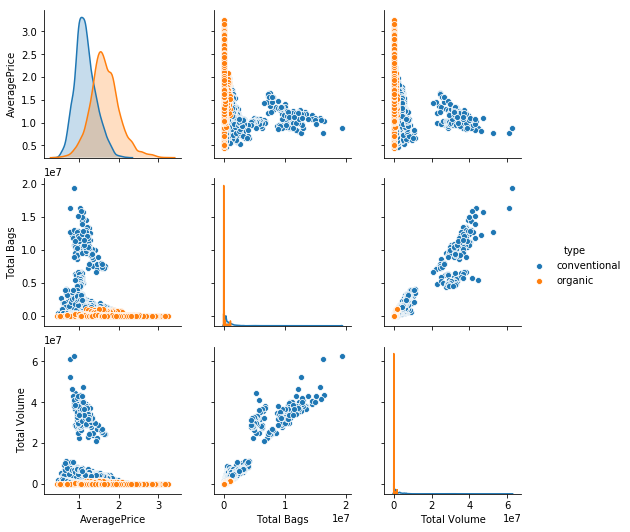

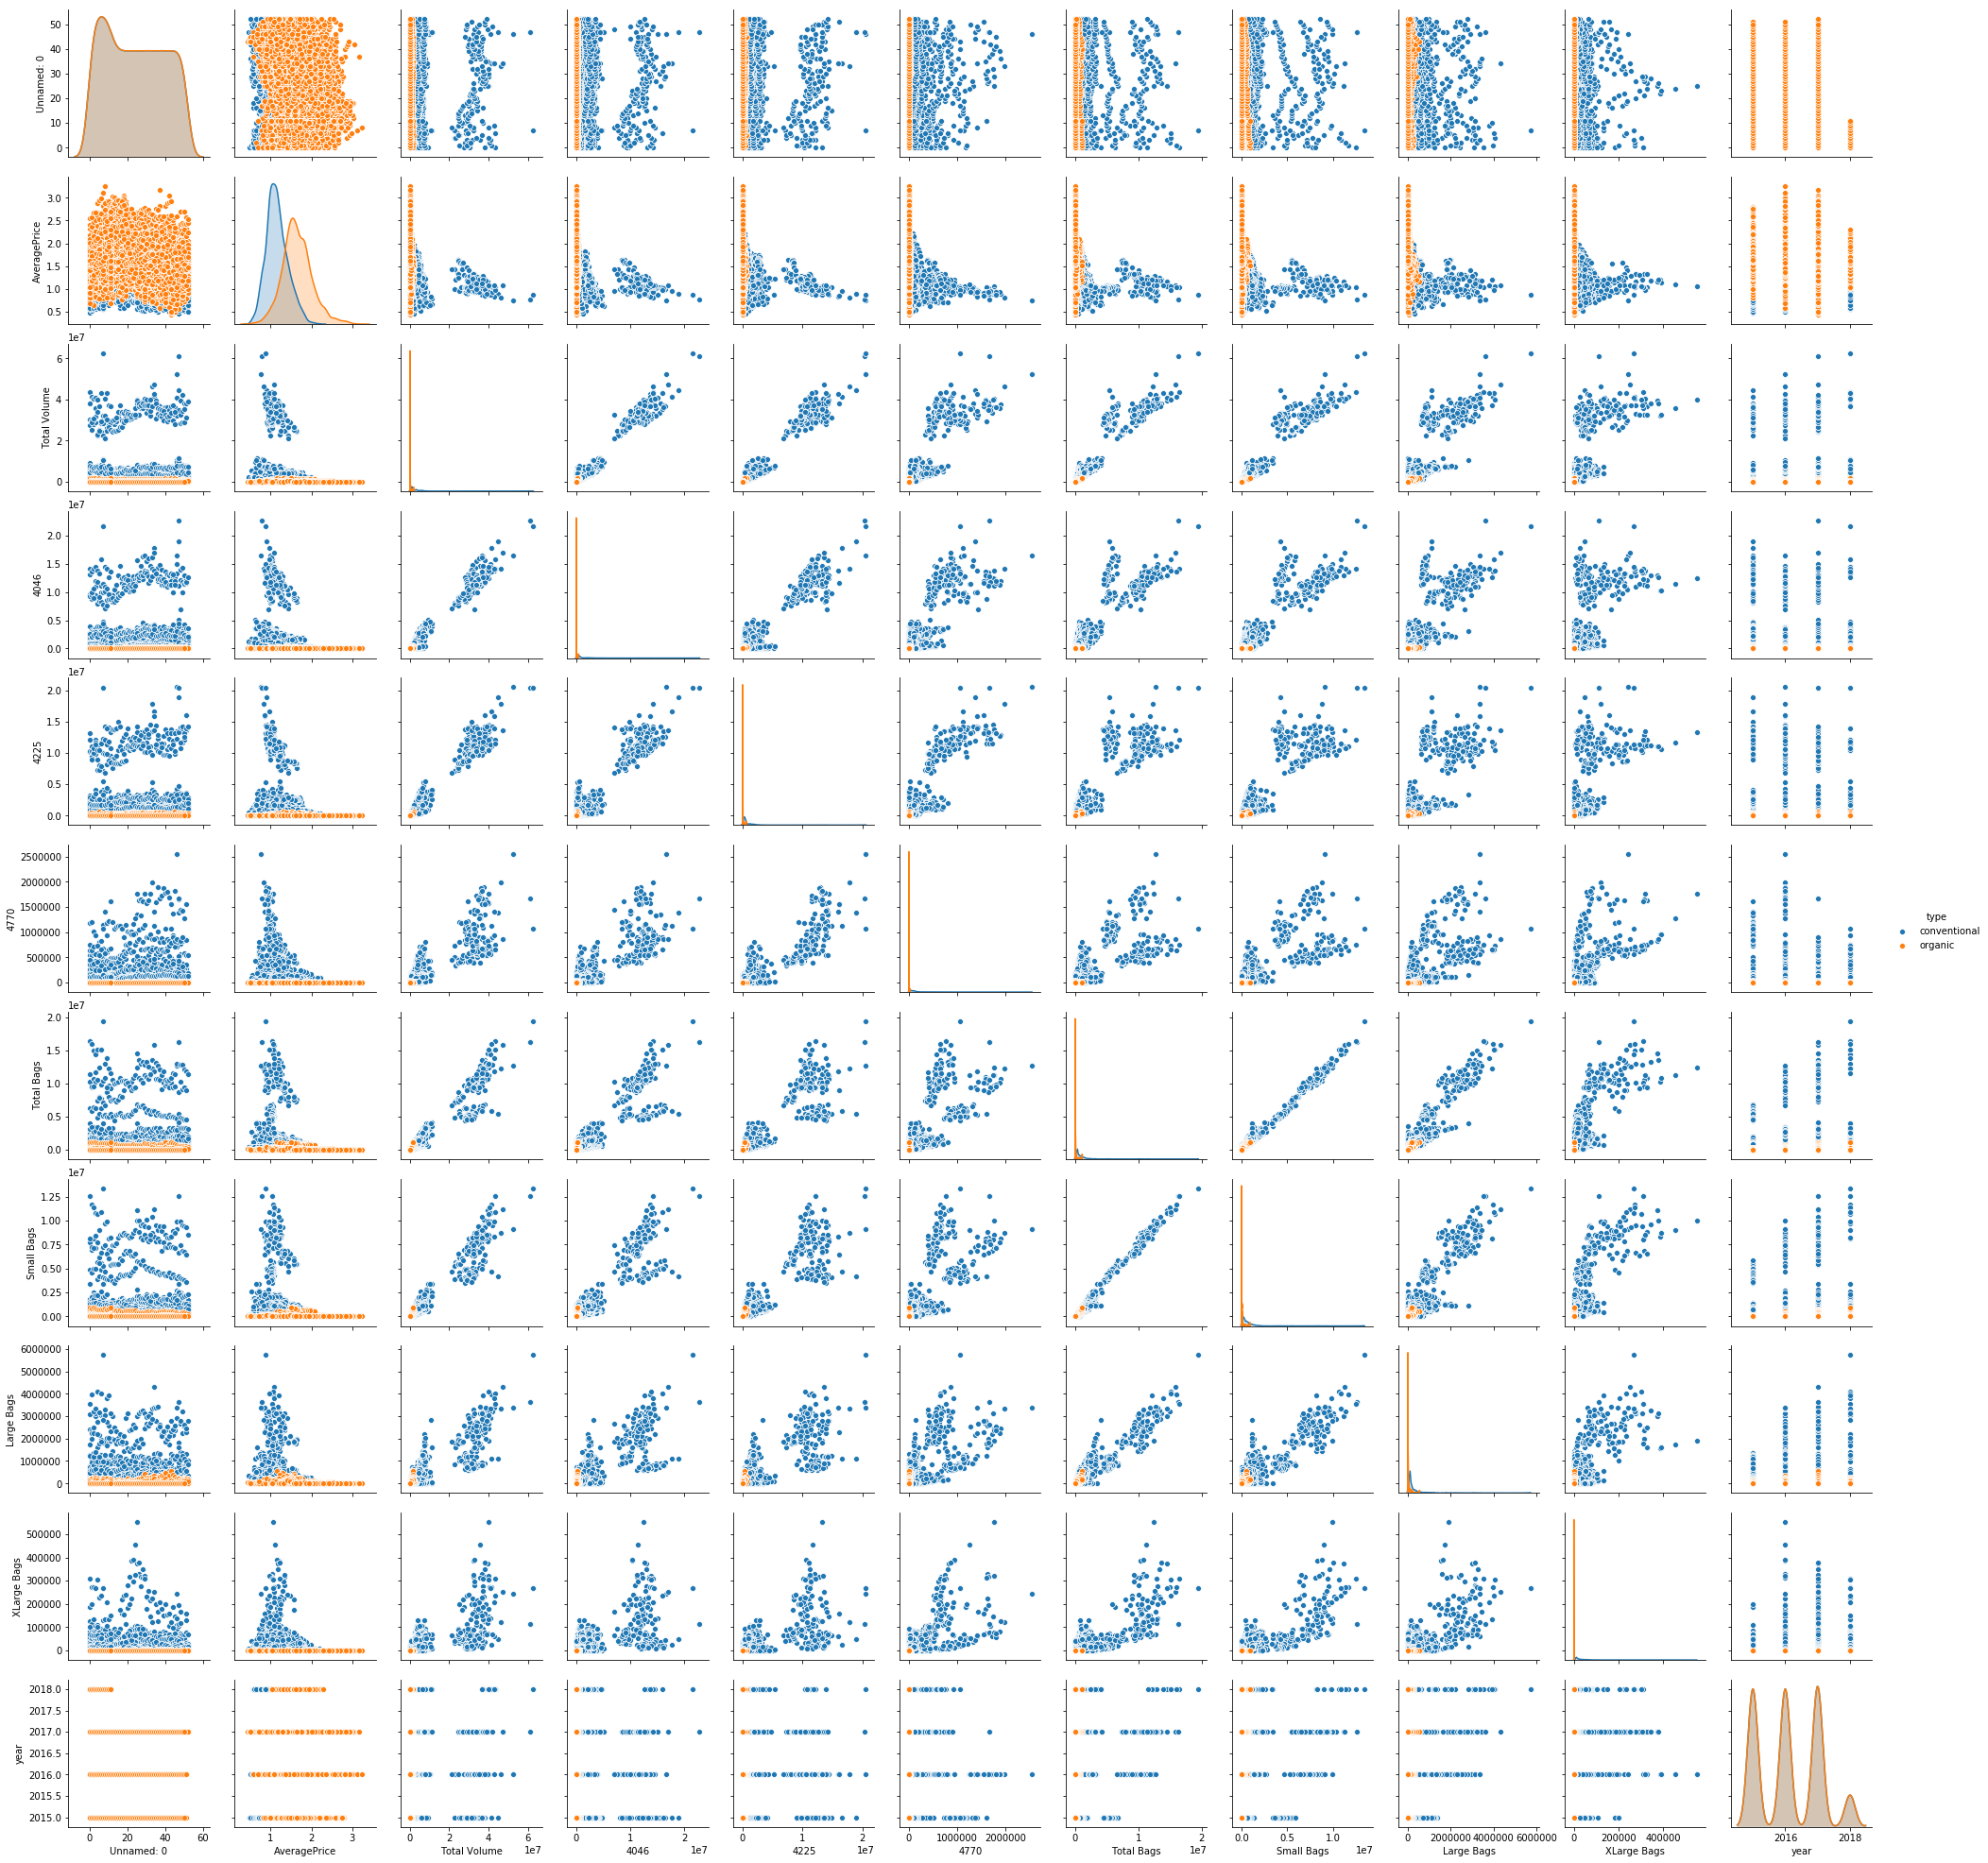

In [7]:
sns.pairplot(data, vars=['AveragePrice', 'Total Bags', 'Total Volume'], hue='type')
sns.pairplot(data,hue='type')

In [8]:
con = data[data["type"] == "conventional"]
org = data[data["type"] == "organic"]

In [9]:
con.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
# output_file("Price_vs_Volume_by_Type.html")
output_notebook()
p = figure(title = "Price vs Volume by Type")
p.circle(x=con['Total Volume'], y=con['AveragePrice'], size=10, color='orange', legend="Conventional", alpha=.5)
p.triangle(x=org['Total Volume'], y=org['AveragePrice'], size=10, color='green', legend="Organic", alpha=.5)
p.legend.location="top_left"
show(p)

Loading BokehJS ...

In [11]:
group = data.groupby('year')
avg = group['AveragePrice'].mean()
std = group['AveragePrice'].std()
Tem = list(group.groups.keys())
print(avg)
print(std)

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64
year
2015    0.375595
2016    0.393708
2017    0.432906
2018    0.305858
Name: AveragePrice, dtype: float64


In [12]:
# output_file("Average_price_vs_year.html")
v = figure(title="Average price By year")
v.vbar(x=Tem, bottom=avg-std, top=avg+std, width=.1, fill_alpha=.2, line_color=None, legend="Average price plus 1 std")
v.circle(x=con['year'], y=con['AveragePrice'], alpha=.5, color="red", legend="Conventional")
v.triangle(x=org['year'], y=org['AveragePrice'], alpha=.1, color='green', legend="Organic")
show(v)

In [13]:
fig = figure(title = "Average Price vs Year")
fig.circle(x=Tem, y=avg, size=10, color='red', legend="Average Price")
fig.line(x=Tem, y=avg, color='red', alpha=.5, legend="Average Price")
fig.y_range=Range1d(0,3)
show(fig)

In [14]:
## credit goes to the kernel listed below
## https://www.kaggle.com/jeppekejser/xgboost-feature-importance-and-avocado-predictions/code

data['Date'] = pd.to_datetime(data.Date)

data['day_of_week'] = data['Date'].dt.weekday_name

data['month'] = data['Date'].dt.month

data['day'] = data['Date'].dt.day

data = data.rename(columns={'Unnamed: 0': 'Store'})

data = data.rename(columns={'4046': 'small Hass', '4225':  'large Hass', '4770':  'extra large Hass'})


mappings_type = {'conventional':0, 'organic':1}

mappings_dayofweek = {'Sunday':1}

mappings_region = {}

v = 0

regions = list(data.region.unique())

numbers = []

for i in regions:
    v = v+1
    numbers.append(v)

d = zip(regions, numbers)

mappings_region = dict(d)

data.type.replace(mappings_type, inplace=True)
data.day_of_week.replace(mappings_dayofweek, inplace=True)
data.region.replace(mappings_region, inplace=True)

In [15]:
data.head()

,Store,Date,AveragePrice,Total Volume,small Hass,large Hass,extra large Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day_of_week,month,day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,1,1,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,1,1,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,1,1,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,1,1,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,1,1,11,29


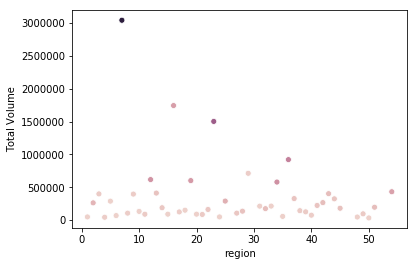

In [16]:
df = data[data['region'] != 52]
df = df[df['region'] != 53]
df = df[df['region'] != 47]
df = df[df['region'] != 46]
df = df[df['region'] != 30]
df = df[df['region'] != 26]
df=df.groupby('region', as_index=False).mean()
plt = sns.scatterplot(data=df, x='region', y='Total Volume', hue='small Hass')
plt.legend_.remove()

## Making Models##

### XGBRegressor ###

In [17]:
X = data.drop(['AveragePrice', 'Date'], axis=1)
y = data['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
xgbCla = xgb.XGBRegressor(n_jobs=4)
xgbCla.fit(X_train, y_train, verbose=True)

xgb_predictions = cross_val_predict(xgbCla, X_test, y_test, cv=6)
xgb_accuracy = metrics.r2_score(y_test, xgb_predictions)
print(xgb_accuracy)

0.7367688032171926


In [18]:
scores = cross_val_score(xgbCla, X, y, scoring='neg_mean_absolute_error', cv=5)
print(scores)
print('Mean Absolute Error: %2f' %(-1 * scores.mean()))

[-0.14888892 -0.15173764 -0.17531245 -0.23578806 -0.27182656]
Mean Absolute Error: 0.196711


In [19]:
mae = metrics.mean_absolute_error(xgb_predictions, y_test)
print("Mean Absolute Error : " + str(mae))

error_percent = mae/data['AveragePrice'].mean()*100
print(str(error_percent) + ' %')

Mean Absolute Error : 0.15432135495747604
10.976082839143693 %


In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
imp_plt = xgb.plot_importance(xgbCla, ax=ax)

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

In [ ]:
sns.pairplot(data, vars=['region', 'year', 'small Hass', 'Large Bags', 'large Hass'], hue='region')

In [ ]:
# credit same as above

thresholds = np.sort(xgbCla.feature_importances_)

best_score = {}

print("Error Percentage: \n")

i = 15
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgbCla, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgb.XGBRegressor(n_jobs=4)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    #print('Mean Absolute Error: %2f' %(-1 * scores.mean()))
    accuracy = metrics.mean_absolute_error(predictions, y_test)
    mae = metrics.mean_absolute_error(predictions, y_test)
    error_percent = mae/data['AveragePrice'].mean()*100
    #print("Thresh={0:f}, n={1:f}, Accuracy: {2:f}, Mean Absolute Error {3:f}: , err_perct: {4:f}%".format(thresh, select_X_train.shape[1], accuracy * 100, mae, error_percent))
    
    best_score[select_X_train.shape[1]] = str(error_percent) + ' %' 
    print(i, ':', best_score[select_X_train.shape[1]])
    i-=1

By examining the ouptut above, we can see that the optimal number of feature to use is toss up between 12-15. For the purposes of making the nueral network shown later faster, we are only going to use 7, since that's where the accuracies start to drop off at a steeper rate.

### SVR(kernel='rfb') ###

In [ ]:
svr_linear = SVR()
svr_linear.fit(X_train, y_train)

svr_linear_predictions = cross_val_predict(svr_linear, X_test, y_test, cv=6)
svr_linear_accuracy = metrics.r2_score(y_test, svr_linear_predictions)

mae_svr = metrics.mean_absolute_error(svr_linear_predictions, y_test)

error_percent_svr = mae_svr/data['AveragePrice'].mean()*100
print(str(error_percent_svr) + ' %')

### Ridge Regression ###

In [ ]:
ridge = Ridge(alpha=.5)

ridge.fit(X_train, y_train)

ridge_predictions = cross_val_predict(ridge, X_test, y_test, cv=6)
ridge_accuracy = metrics.r2_score(y_test, ridge_predictions)

mae_ridge = metrics.mean_absolute_error(ridge_predictions, y_test)

error_percent_ridge = mae_ridge/data['AveragePrice'].mean()*100
print(str(error_percent_ridge) + ' %')

### Lasso ###

In [ ]:
lass = Lasso(alpha=.01)

lass.fit(X_train, y_train)

lass_predictions = cross_val_predict(lass, X_test, y_test, cv=6)
lass_accuracy = metrics.r2_score(y_test, lass_predictions)

mae_lass = metrics.mean_absolute_error(lass_predictions, y_test)

error_percent_lass = mae_lass/data['AveragePrice'].mean()*100
print(str(error_percent_lass) + ' %')

By reviewing the error percentages shown above, we can see that XGBoost is (at this moment) the optimal algorithm for predicting the price of Avocados based on the data given.

### Neural Network ###

In [ ]:
# y = y.values.reshape(-1, 1)
# NN_x = X.drop(['XLarge Bags', 'day_of_week', 'type', 'extra large Hass', 'Small Bags', 'Store', 'Total Volume', 'day'], axis=1)


In [ ]:
# print(NN_x.shape)
# print(y.shape)

In [ ]:
# define and fit the final model
# scalar = MinMaxScaler()

# print(scalar.fit(NN_x))
# print(scalar.fit(y))

# xscale=scalar.transform(NN_x)
# yscale=scalar.transform(y)

# X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2, random_state=10)

# model = Sequential()
# model.add(Dense(7428, input_dim=NN_x.shape[1]))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(7428))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(4, activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', 
#               optimizer='adam', 
#               metrics=['accuracy']
#              )
# model.summary()


In [ ]:
# model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
# print("HERE")

# early = EarlyStopping(monitor="val_acc", mode="max", patience=3)

# model.fit(NN_x, np_utils.to_categorical(y),
#                   batch_size=1000, 
#                   epochs=30,
#                   validation_split=0.2,
#                   verbose=2,
#                   callbacks=[early]
#              )

# NN_predictions = cross_val_predict(model, X_test, y_test, cv=6)
# NN_accuracy = metrics.r2_score(y_test, NN_predictions)

# mae_NN = metrics.mean_absolute_error(NN_predictions, y_test)

# error_percent_NN = mae_NN/data['AveragePrice'].mean()*100
# print(str(error_percent_NN) + ' %')